In [7]:
# https://www.kaggle.com/datasets/adityakadiwal/water-potability?resource=download
#%% Librarys

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

import missingno as msno 
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV , RepeatedStratifiedKFold , train_test_split  
from sklearn.metrics import precision_score , confusion_matrix

from sklearn import tree

In [5]:
df = pd.read_csv("/Users/ferhatkoc/Desktop/machine_learning/su_kalitesi/water_potability.csv")

In [9]:
describe = df.describe()
describe

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


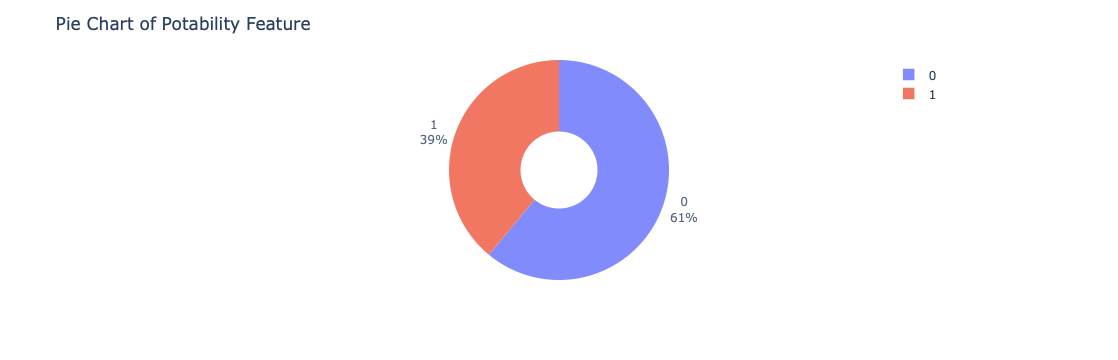

In [12]:
d = df["Potability"].value_counts().reset_index()
d.columns = ["PotabilityLabel", "Count"]

fig = px.pie(
    d,
    values="Count",
    names="PotabilityLabel",
    hole=0.35,
    opacity=0.8,
    labels={"PotabilityLabel": "Potability", "Count": "Number of Samples"}
)

fig.update_layout(title="Pie Chart of Potability Feature")
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()
fig.write_html("Potability_pie_chart.html")

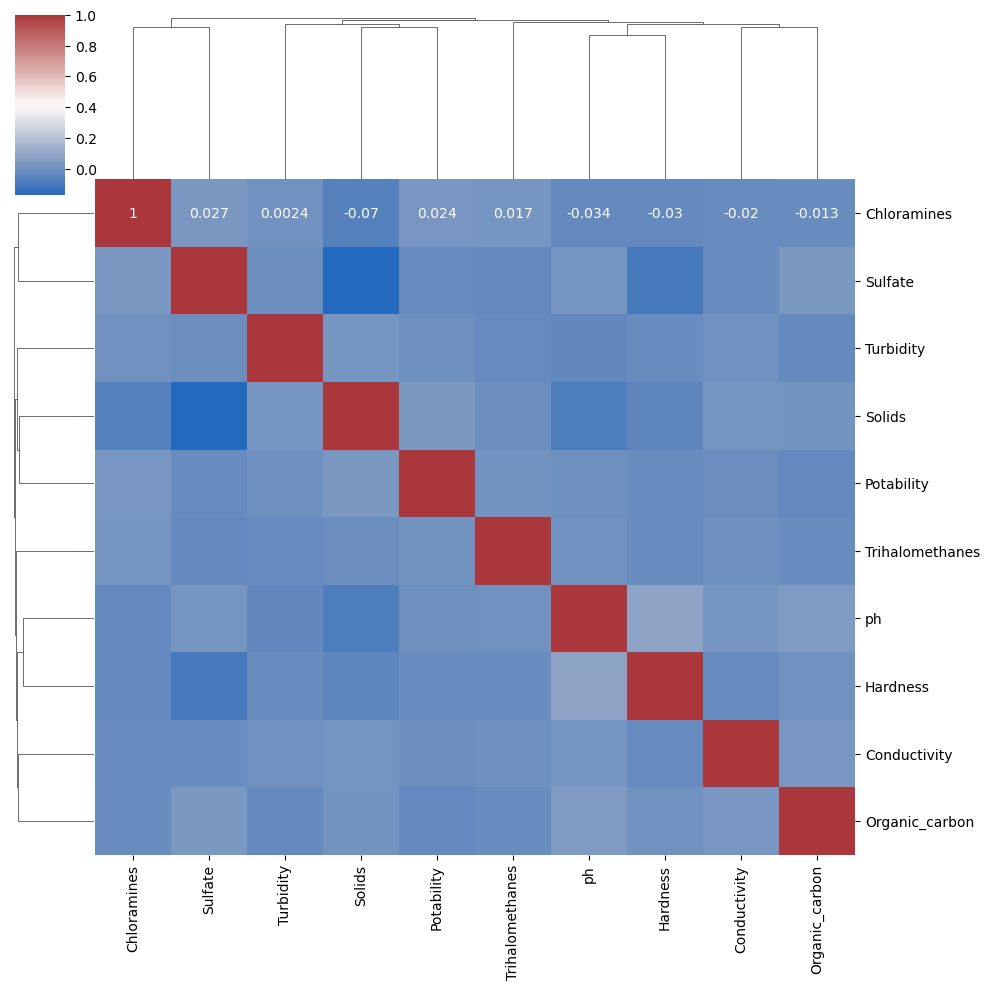

In [13]:
sns.clustermap(df.corr(), cmap="vlag", dendrogram_ratio = (0.1,0.2),annot = True, linewidths= (0,8),figsize = (10,10))
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

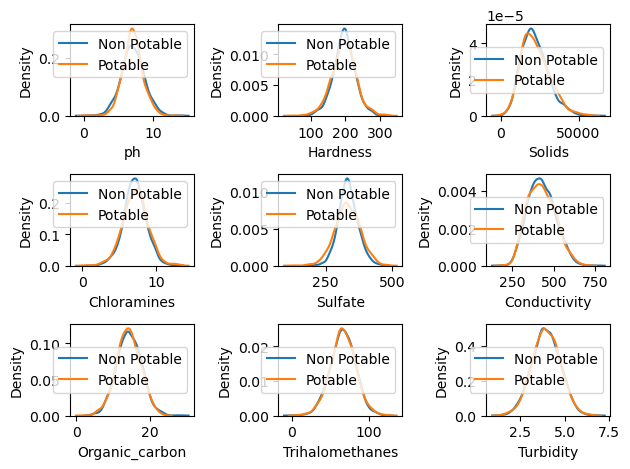

In [14]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure()
for ax , col in enumerate(df.columns[:9]):
       plt.subplot(3, 3 , ax + 1)
       sns.kdeplot(x = non_potable[col], label = "Non Potable")
       sns.kdeplot(x = potable[col], label = "Potable")     
       plt.legend()
       
plt.tight_layout()       

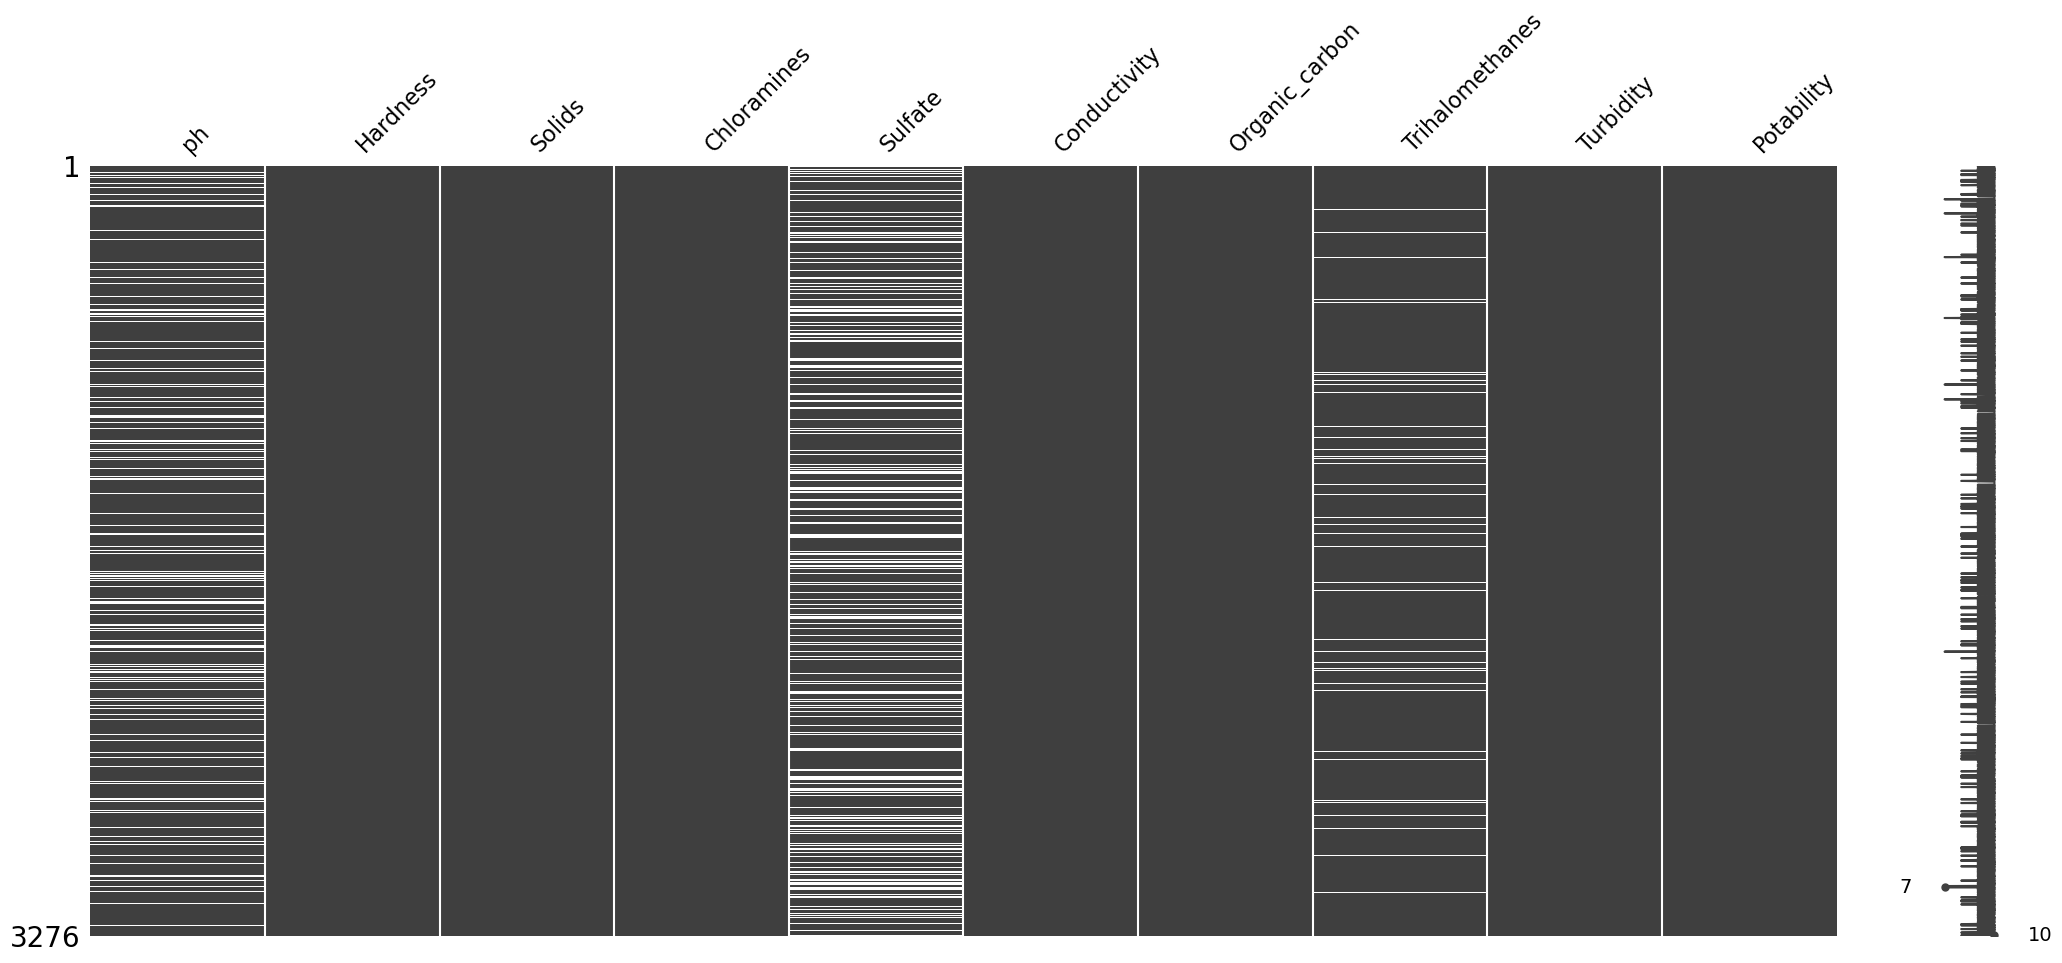

In [15]:
msno.matrix(df)
plt.show()

In [17]:
#print(df.isnull().sum())

df["ph"].fillna(value= df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value= df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value= df["Trihalomethanes"].mean(), inplace = True)
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


/var/folders/6z/mxk7_2ks6g11qnmjx0r1qhf80000gn/T/ipykernel_28938/3228651723.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/6z/mxk7_2ks6g11qnmjx0r1qhf80000gn/T/ipykernel_28938/3228651723.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [18]:
X =  df.drop("Potability", axis = 1).values    
y = df["Potability"].values                                        


In [19]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42 ) 

In [21]:
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)

[('DTC', 0.72), ('RF', 0.66)]


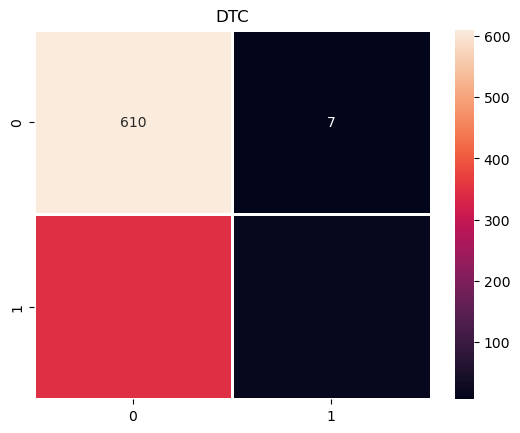

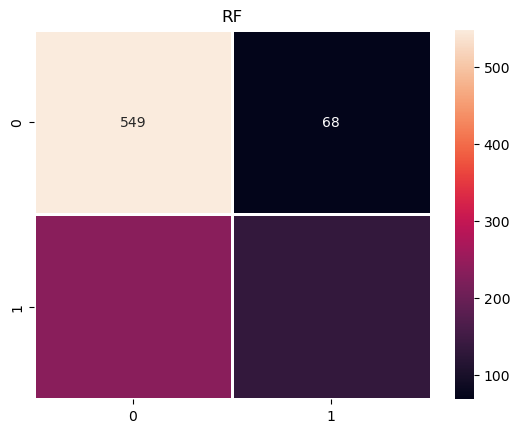

In [22]:
models = [("DTC", DecisionTreeClassifier(max_depth=3)),
          ("RF", RandomForestClassifier())]
finalResult = []
cmlist = []

for name , model  in models:
    
    model.fit(X_train,y_train)
    
    model_result = model.predict(X_test)
    
    score = precision_score(y_test , model_result)
    finalResult.append((name ,score))
    
    cm = confusion_matrix(y_test , model_result)
    cmlist.append((name ,cm)) 
    
print(finalResult)

for name, i in cmlist:
    plt.figure()
    sns.heatmap(i, annot=True, linewidths=0.8, fmt=".0f")
    plt.title(name)
    plt.show()


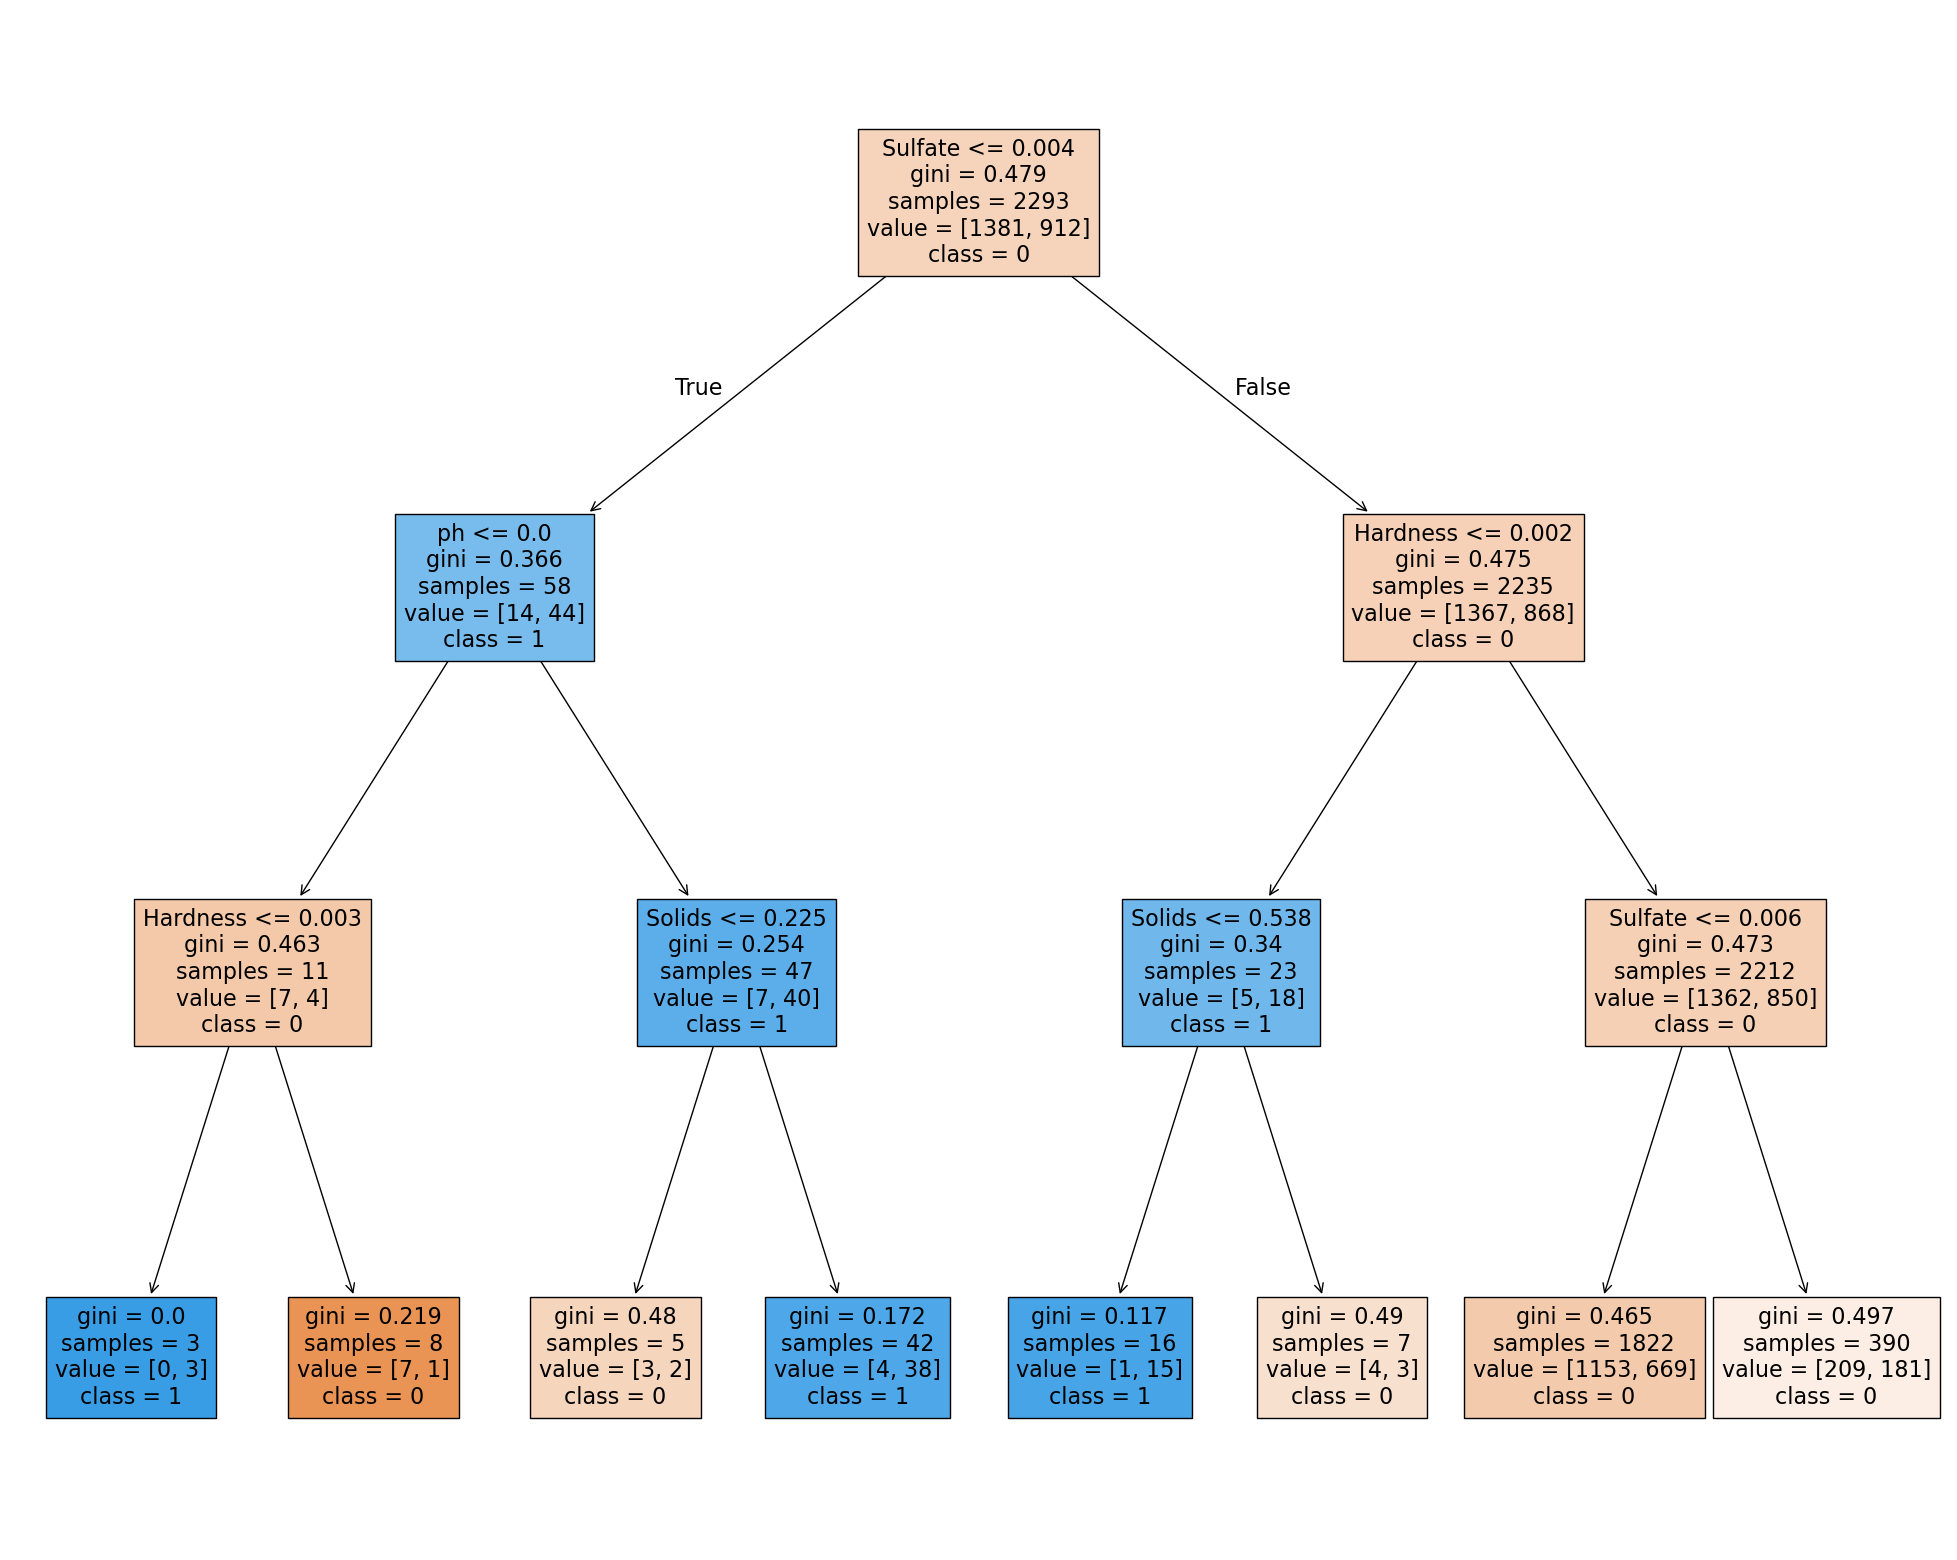

In [23]:
dt_clf = models[0][1]  # DecisionTreeClassifier

plt.figure(figsize=(25,20))
tree.plot_tree(
    dt_clf,
    feature_names=df.columns.tolist()[:-1],
    class_names=["0", "1"],
    filled=True
)
plt.show()

In [24]:
model_params = {
    "Random Forest":
       {
        "model":RandomForestClassifier(),
        "params":
            {
                "n_estimators":[10,50,100],
                "max_features":["auto","sqrt","log2"],
                "max_depth":list(range(1,21,3))
                }
        
        }
        
   }

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores = []

for model_name , params in model_params.items():
   rs = RandomizedSearchCV(params["model"], params["params"],cv = cv, n_iter=10 ) 
   rs.fit(X,y)
   scores.append([model_name, dict(rs.best_params_), rs.best_score_ ])
  
print(scores)   

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning:


30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 471, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.11/site-pa

[['Random Forest', {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 19}, 0.672009635077267]]


In [ ]:
##[['Random Forest', {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 19}, 0.672009635077267]]